0. Open
1. Review
2. Topic

    2.1 Deep Learning 학습방법
    
    2.2 Keras의 이해
    
    2.3 MLP 이용 텍스트 분류 실습
    
3. Q&A
4. Next
5. Close

## 행렬 곱셈을 이용한 순전파(Forward Propagation)

- 인공 신경망은 입력층에서 출력층 방향으로 연산은 진행

### 행렬의 크기 예측

- 각 층에 대한 입력과 출력의 개수
    * Layer 0 - 입력층 : 입력 4개, 출력 8개
    * Layer 1 - 은닉층 1 : 입력 8개, 출력 8개
    * Layer 2 - 은닉층 2 : 입력 8개, 출력 3개
    * Layer 3 - 출력층 : 입력 3개, 출력 3개

$X_(m Ⅹ n) Ⅹ W_(?Ⅹ?) + B_(?Ⅹ?) = Y_(mⅩj)$

- Layer 1의 행렬 크기 추정
    - X 1 x 4 x W ? x ? + B ? x ? = Y m x j: 앞에 1은 배치사이즈, 
    - X 1 x 4 x W ? x ? + B ? x ? = Y 1 x 8
    - X 1 x 4 x W 4 x 8 + B ? x ? = Y 1 x 8
    - X 1 x 4 x W 4 x 8 + b 1 x 8 = Y 1 x 8
    
- Layer 2의 행렬의 크기 추정
    - X 1 x 8 x W 8 x 8 + B 1 x 8 = Y 1 x 8

- Layer 3의 행렬의 크기 추정
    - X 1 x 8 x W 8 x 3 + B 1 x 3 = Y 1 x 3
    
- 인공 신경망은 입력층에서 은닉층을 지나 출력층에서 예측값을 계산하는 과정을 행렬 연산으로 수행
- 학습을 통해 예측값과 실제값으로부터 오차를 계산하고 그 결과로 가중치와 편향 업데이트

## 순전파 (Forward Propagation)

1. 활성화 함수, 은닉층의 수, 각 은닉층의 뉴런 수 등 DNN 모델을 설제
2. 입력값은 입력층, 은닉층을 지나면서 각 층에서 가중치와 함께 연산되며 출력층으로 향한다.
3. 출력층에서 모든 연산을 마친 예측값이 나오게 된다.
4. 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정을 순전파라 한다.

## 손실 함수(Loss Function)

- 실제값과 예측값의 차이를 계산하는 함수
- 오차가 클수록 손실 함수의 값은 크고 오차가 작을수록 손실함수의 값은 작아진다.
- 회귀 : 평균 제곱 오차(MSE)
- 분류 : 크로스 엔트로피(Cross Entropy)


- 이진 분류 : binary crossentropy
- 다중 클래스 분류 : categorical crossentropy

## Optimizer

- 손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 결정된다.
- 배치(Batch) : 가중치 등의 매개변수의 값을 조정하기 위해 사용하는 데이터 양


### 배치 경사 하강법(Batch Gradient Descent)

- 가장 기본적인 옵티마이저
- 오차(loss)를 구할 때 전체 데이터를 고려한다.
- 한번의 훈련시 모든 매개 변수 업데이트를 단 한 번 수행하는 옵티마이저
- 전체 데이터를 고려해서 학습하므로 epoch(훈련 횟수)당 시간이 오래걸리며, 메모리를 크게 요구하는 단점이 있다.
- 글로벌 미니멈을 찾을 수 있다는 장점이 있다.

In [ ]:
keras.model.fot(x_train, y_train, batch_size=len(train_x))

### 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
- 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법
- 매개변수의 변경 폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수 있다.
- 속도가 빠르다는 장점이 있다.

In [ ]:
keras.model.fot(x_train, y_train, batch_size=1)

### 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
- 전체 데이터가 아니고, 1개의 데이터도 아니고, 정해진 양에 대해서만 계산하여 매개 변수의 값을 조정하는 경사 하강법
- 전체 데이터를 계산하는 것보다는 빠르고, SGD보다 안정적으로 매개변수 변경
- 가장 많이 사용

In [ ]:
keras.model.fit(X_train, y_train, batch_size=32) # 32는 배치의 크기

### 모멘텀(Momentum) SGD
- 모멘텀은 관성이라는 물리학 법칙을 응용한 방법
- 경사 하강법에 관성을 더해준다.
- 계산된 접선의 기울기에 한 시점(step) 전의 접선의 기울기 값을 일정한 비율만큼 반영

In [ ]:
keras.optimizer.SGD(lr=0.01, momentum=0.9)

### 아다그라드(Adagrad)

- 매개변수는 각자 의미가 다른데 모든 매개변수에 동일한 학습률(learning rate)를 적용하는 것이 비효율적이다.
- 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킨다.
- 변화가 많은 매개변수는 학습률을 적게 적용하고, 변화가 적은 매개변수는 학습률을 많이 적용

In [ ]:
keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

### 알엠에스프롭(RMSprop)

- 아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어지는 단점

In [ ]:
keras.optimizer.RMSProp(lr=0.001, rho=0.9, epsilon=1e-6)

### Adam

- Adagrad와 RMSProp을 합쳐놓은 optimizer
- 방향과 학습률 두가지 문제를 해결할 수 있는 optimizer

In [ ]:
keras.optimizer.Adam(lr=0.001, beta_1=0.0, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

- epoch : 전체 데이터에 대해서 순전파와 역전파가 끝난 상태
    - 예) 50 에포크 : 전체 데이터 단위로 총 50번 학습을 했다
    - 에포크가 너무 지나치거나 너무 모자르면 과적합 또는 과소적합이 발생
    
- batch size : 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말함
    - 2000개 데이터에 대해서 200개의 배치 크기를 가지면 배치수는 10이 됨
    
- iteration : 한 번의 에포크를 끝내기 위해서 필요한 배치 수

## 과적합(Overfitting)을 막는 방법들

- 학습 데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어뜨리는 이슈
- 모델이 과적합이 되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터(검증 데이터, 테스트데이터)에 대해서 제대로 작동하지 않는 경우
- 모델이 학습 데이터를 불필요할 정도로 과도하게 학습하거나 훈련 데이터에 포함된 노이즈까지 학습한 상태라고 해석할 수 있다.

### 1. 데이터의 양을 늘린다.

- 데이터양을 늘린다는 것은 데이터의 일반적인 패턴을 학습하여 과적합을 방지
- 원래 데이터양이 적을 때에는 의도적으로 기존 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리는 방법을 사용하기도 한다. - 데이터 증식 또는 증강(Data Augmentation)
- K-fold : 학습 데이터 분할

### 2. 모델의 복잡도 줄이기

- 인공 신경망의 복잡도는 은닉층의 수나 매개변수의 수 등으로 결정한다.
- 모델 수용력(capacity) : 인공 신경만에서 모델에 있는 매개변수의 수

### 3. 가중치 규제(Regulation) 적용하기

- 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제
    1. L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가한다.(L1 norm), 가중치가 0인 경우가 발생, 가중치가 모델에 영향을 미치는지 대한 유무 확인 -> 어떤 특성들이 모델에 영향을 주고 있는지 정확히 판단하고자 할 때 유용
    2. L2 규제 : 모든 가중치 W들의 제곱을 비용 함수에 추가한다.(L2 norm), 가중치가 0에 근접한 값, 어떤 특성들이 모델에 영향을 주고 있는지 정확히 판단이 필요없는 경우 유용, 가중치 감쇠(weight decay) -> 성능이 L1보다는 높다

### 4. 드롭아웃(Dropout)
- 학습 과정에서 신경망의 일부를 사용하지 않는 방법

In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

## 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

- 기울기 소실 : 인공 신경망 역전파 과정에서 입력층으로 갈수록 기울기(Gradient)가 점차적으로 작아지는 현상으로 입령층에 가까운 층들에서 가중치 업데이트가 제대로 이루어지지 않으므로 최적의 모델을 찾을 수 없는 현상
- 기울기 폭주 : 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 하는 현상, 주로 RNN(Recurrent Neural Network, RNN)에서 발생

### 1. ReLU와 ReLU 변형 함수 사용

- 은닉층에는 시그모이드 함수를 사용하지 않는다.
- Leakt ReLU 함수를 사용
- 은닉층에는 ReLU나 ReLU 변형 함수 사용

### 2. 그래디언트 클리핑(Gradient Clipping) - 기울기 폭주에 대한 해결

- 기울기 값을 자르는 것
- 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자른다.

In [ ]:
keras.optimizer.Adam(lr=0.0001, clipnorm=1.)

### 3. 가중치 초기화(Weight Initialization)

- 같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌는가에 따라서 모델의 훈련 결과가 달라진다.
- 가중치 초기화만 적절히 해줘도 가중치 소실 문제를 해결(완화)할 수 있다.

#### 가비어 초기화(Xavier Initialization) or 글로럿 초기화(Glorot Initialization)

- 균등분포 또는 정규 분포를 이용하여 초기화
- 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막는다.
- 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이나 ReLU와 함께 사용하면 성능이 좋지 않다.

#### He 초기화(He Initialization)

- 정규 분포와 균등 분포 두 가지로 나누어 적용
- He 초기화는 가이버 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않는다.
- ReLU 계열 함수를 사용할 경우 효율적

#### 가중치 초기화 방법 : ReLU 함수 + He 초기화 방법이 가장 보편적인 방법

## 배치 정규화 방법
### 층 정규화 방법

## Keras

- Keras는 오픈소스 기반의 인공신경망 파이썬 프레임워크 라이브러리
- Tensorflow의 상위 레벨 인터페이스

### 1. 전처리(Preprocessing)

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
t = Tokenizer()

In [4]:
fit_text = "The earth is an awesome place live"

In [5]:
t.fit_on_texts([fit_text])

In [8]:
test_text = "The earth is an great place live"
sequences = t.texts_to_sequences([test_text])[0]

In [9]:
print("sequences :", sequences)
print("word index :", t.word_index)

sequences : [1, 2, 3, 4, 6, 7]
word index : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


pad_sequences() : 모델의 입력으로 사용하려는 모든 샘플 데이터의 길이를 동일하게 맞추기 위하여 패딩(padding) 작업을 수행하는 함수

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 6]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 6]])

- 첫번쩨 인수 : padding을 진행할 데이터
- maxlen : 모든 데이터에 대해서 정규화 할 길이
- padding : 'pre'-앞에 0을 채우고, 'post'-뒤에 0을 채움

### 2. 워드 임베딩(Word Embedding)

### 3. 모델링(Modeling)

Sequential() : 인공 신경망에서 층을 구성할 때 사용하는 객체, 이를 이용하여 model을 생성한 후 model.add()로 Layer를 추가

In [12]:
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()
# model.add() # 입력층
# model.add() # 은닉층
# model.add() # 출력층

- Embedding()을 통해 생성하는 임베딩 층(Embedded layer)를 추가할 수 있다
- Dense() : 전결합층(Fully-Connected layer)을 추가하는 함수

In [ ]:
model.add(Embedding(vocabulary, output_dim, input_length))

In [15]:
from tensorflow.keras.layers import Dense

model.add(Dense(1, input_dim=3, activation='relu'))

- 첫번째 인수 : 출력 뉴런 수
- input_dim = 입력 뉴런 수(입력 차원)
- activation = 활성화 함수
    - linear : default, 활성화 함수 없이 가중치 계산 결과 그대로 출력, 회귀 문제
    - sigmoid : 시그모이드 함수, 이진 분류 문제
    - softmax : 소프트맥스 함수, 다중 클래스 분류 문제
    - relu : ReLU 함수, 은닉층

In [17]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### 4. 컴파일(Compile)과 훈련(Training)

### 5. 평가(Evaluation)와 예측(Prediction)

### 6. 모델 저장(Save)와 로드(Load)

### Keras 함수형 API

## MLP를 이용한 텍스트 분류 - Feed Forward Neural Network

In [19]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
text = ["먹고 싶은 사과", "먹고 싶은 바나나", "길고 노란 바나나", "저는 과일이 좋아요"]

In [21]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 정수 인코딩

{'먹고': 1, '싶은': 2, '바나나': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [22]:
print(t.texts_to_matrix(text, mode='count')) # DTM

[[0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [23]:
print(t.texts_to_matrix(text, mode='binary')) # 해당 단어의 존재 유무만 확인

[[0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [24]:
print(t.texts_to_matrix(text, mode='tfidf').round(2)) # TF-IDF matrix

[[0.   0.85 0.85 0.   1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.85 0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [25]:
print(t.texts_to_matrix(text, mode='freq').round(2)) # 각 문서에서 각 단어의 등장 횟수를 분자로, 각 문서의 크기(전체 단어 총 합)를 분모로 한 표현

[[0.   0.33 0.33 0.   0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.33 0.   0.33 0.33 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


## 20개 뉴스 그룹에 대한 테스트 분류

#### 데이터 이해

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [28]:
newsdata = fetch_20newsgroups(subset='train') # 'train'을 기재하면 훈련 data만 리턴

In [30]:
print(newsdata.keys()) # data - text 내용, target - 분류

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [31]:
print("훈련용 데이터 개수 : {}".format(len(newsdata.data)))

훈련용 데이터 개수 : 11314


In [33]:
print("총 주제 개수 :{}".format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제 개수 :20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [35]:
print("첫번째 샘플의 레이블: {}".format(newsdata.target[0]))

첫번째 샘플의 레이블: 7


In [36]:
print("7번째 레이블이 의미하는 주제 : {}".format(newsdata.target_names[7]))

7번째 레이블이 의미하는 주제 : rec.autos


In [37]:
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [42]:
data.isnull().values.any()

False

In [45]:
print("중복을 제외한 샘플 수 : {}".format(len(data['email'].unique())))
print("중복을 제외한 타겟 수 : {}".format(len(data['target'].unique())))

중복을 제외한 샘플 수 : 11314
중복을 제외한 타겟 수 : 20


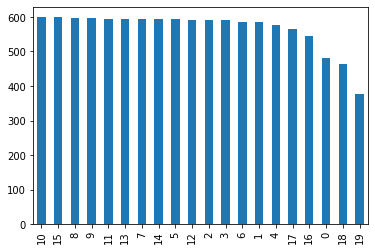

In [47]:
data['target'].value_counts().plot(kind='bar')

In [48]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


### 학습 데이터와 테스트 데이터 분리

In [60]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

### 텍스트 데이터 전처리

In [61]:
num_words = 10000
num_classes = 20

In [62]:
def prepare_data(train_data, test_data, mode):
    t = Tokenizer(num_words = num_words)
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode)
    X_test = t.texts_to_matrix(test_data, mode=mode)
    
    return X_train, X_test, t.index_word

In [63]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [64]:
print("훈련 샘플 본문의 크기 : {}".format(X_train.shape))
print("테스트 샘플 본문의 크기 : {}".format(X_test.shape))
print("훈련 샘플 레이블의 크기 : {}".format(y_train.shape))
print("테스트 샘플 레이블의 크기 : {}".format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
테스트 샘플 본문의 크기 : (7532, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 레이블의 크기 : (7532, 20)


### MLP를 사용하여 텍스트 분류

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [73]:
# MLP 모델 설계
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape =(num_words,), activation='relu') )
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    
    return score[1]

In [74]:
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)

Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 4s 384us/sample - loss: 2.2349 - accuracy: 0.3441 - val_loss: 0.9278 - val_accuracy: 0.8198
Epoch 2/5
10182/10182 [==============================] - 3s 298us/sample - loss: 0.8701 - accuracy: 0.7606 - val_loss: 0.4610 - val_accuracy: 0.8790
Epoch 3/5
10182/10182 [==============================] - 3s 307us/sample - loss: 0.4354 - accuracy: 0.8836 - val_loss: 0.3412 - val_accuracy: 0.9055
Epoch 4/5
10182/10182 [==============================] - 3s 297us/sample - loss: 0.2586 - accuracy: 0.9334 - val_loss: 0.3089 - val_accuracy: 0.9099
Epoch 5/5
10182/10182 [==============================] - 3s 292us/sample - loss: 0.1754 - accuracy: 0.9569 - val_loss: 0.2971 - val_accuracy: 0.9134
Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 4s 437us/sample - loss: 2.7829 - accuracy: 0.2489 - val_loss: 1.5896 - val_accuracy: 0.7509
Epoch 2/